In [2]:
from matplotlib import pyplot as plt
from pa228_tools import ishow
from pathlib import Path
import tqdm
import pandas as pd
import glob
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from pa228_tools import show_seg_sample, plot_seg_result
from sklearn.model_selection import train_test_split
from dataset import SampleDataset
# from network import SampleModel

In [3]:

PATH = Path('data', 'data_seg_public')
town_dir = PATH / 'img'
mask_dir = PATH / 'mask'
img_files = sorted(glob.glob("{}/*/*.png".format(town_dir)))
mask_files = sorted(glob.glob("{}/*/*.png".format(mask_dir)))
df = pd.DataFrame({'img': img_files, 'mask': mask_files})


In [4]:
import os

def count_items_in_subfolders(root_dir):
    # Initialize a dictionary to store the counts for each subfolder
    subfolder_counts = {}

    # Traverse the directory structure
    for dirpath, _, filenames in os.walk(root_dir):
        # Count the number of items in the current subfolder
        num_items = len(filenames) + len(os.listdir(dirpath))

        # Store the count in the dictionary
        subfolder_counts[dirpath] = num_items

    return subfolder_counts

# Example usage:
root_directory = PATH / 'img'
subfolder_counts = count_items_in_subfolders(root_directory)

# Print the counts for each subfolder
for subfolder, count in subfolder_counts.items():
    print(f"Subfolder: {subfolder}, Number of items: {count}")

Subfolder: data/data_seg_public/img, Number of items: 21
Subfolder: data/data_seg_public/img/erfurt, Number of items: 204
Subfolder: data/data_seg_public/img/weimar, Number of items: 264
Subfolder: data/data_seg_public/img/munster, Number of items: 330
Subfolder: data/data_seg_public/img/dusseldorf, Number of items: 416
Subfolder: data/data_seg_public/img/stuttgart, Number of items: 366
Subfolder: data/data_seg_public/img/bochum, Number of items: 184
Subfolder: data/data_seg_public/img/aachen, Number of items: 336
Subfolder: data/data_seg_public/img/bremen, Number of items: 608
Subfolder: data/data_seg_public/img/ulm, Number of items: 182
Subfolder: data/data_seg_public/img/zurich, Number of items: 224
Subfolder: data/data_seg_public/img/lindau, Number of items: 114
Subfolder: data/data_seg_public/img/cologne, Number of items: 282
Subfolder: data/data_seg_public/img/hamburg, Number of items: 454
Subfolder: data/data_seg_public/img/krefeld, Number of items: 182
Subfolder: data/data_seg_

In [26]:
transforms_train = A.Compose([
                        A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
                        ToTensorV2(),
                        ]   
                    )

# tensor([0.3210, 0.2343, 0.2740]) tensor([0.1852, 0.1621, 0.1804])
train_df, valid_df = train_test_split(df, test_size=.3, random_state=2)
traindataset = SampleDataset(dataset_df=train_df, transforms=transforms_train)
def get_dataset_stats(ds):
    '''
    Inputs:
        ds   - pytorch dataset
             - the sample shape [3, W, H]
             - torch tensor, values in range (0, 1)
        
    Outputs:
        dataset mean value per color channel 
        dataset standard deviation per color channel 
    '''
    
    # use torch.stack to stick all the images together to form a 50000 X 3 X 32 X 32 array
    x = torch.stack([sample for sample, _ in ds])

    
    ds_mean = x.mean(axis=(0, 2, 3))
    ds_std = x.std(axis=(0, 2, 3))
        
    return ds_mean, ds_std

mean, std = get_dataset_stats(traindataset)
print(mean, std)

tensor([0.3210, 0.2343, 0.2740]) tensor([0.1852, 0.1621, 0.1804])


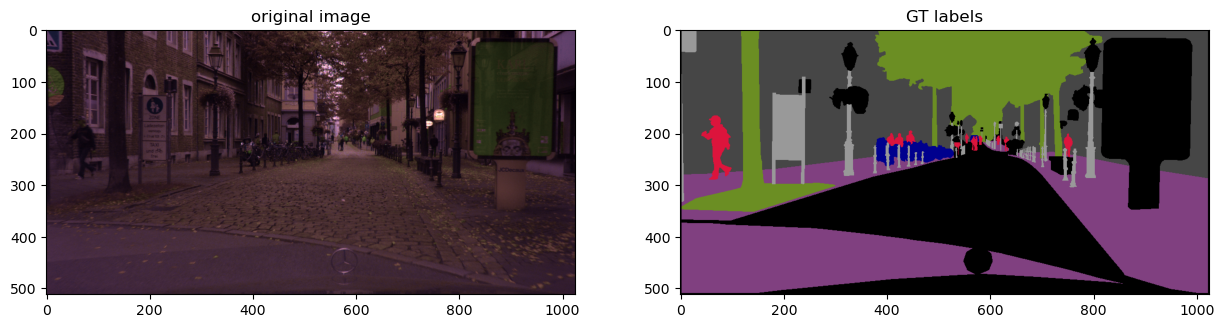

tensor([0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667, 0.0706,
        0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020, 0.1059,
        0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373, 0.1412,
        0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725, 0.1765,
        0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078, 0.2118,
        0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431, 0.2471,
        0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784, 0.2824,
        0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137, 0.3176,
        0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490, 0.3529,
        0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843, 0.3882,
        0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196, 0.4235,
        0.4275, 0.4314, 0.4353, 0.4392, 0.4431, 0.4471, 0.4510, 0.4549, 0.4588,
        0.4627, 0.4667, 0.4706, 0.4745, 

In [25]:

transforms_train = A.Compose([
                        A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
                        ToTensorV2(),
                        ]   
                    )

train_df, valid_df = train_test_split(df, test_size=.3, random_state=2)
traindataset = SampleDataset(dataset_df=train_df, transforms=transforms_train)


# Load the entire model from a file
device = torch.device('cpu')
model = torch.load('ce026_all.pt', map_location=device)
IDX = 1
sample = traindataset[IDX]
x, y = sample
pred = model(x.unsqueeze(0))

show_seg_sample(sample)
x.unique()

In [11]:

import sys
import matplotlib.pyplot as plt
from pa228_tools import ishow

import torch
import pandas as pd
# from torchview import draw_graph
# from network import ModelExample
from dataset import SampleDataset
from sklearn.model_selection import train_test_split
from pathlib import Path
from network import SampleModel
from pa228_tools import  plot_seg_result, show_seg_sample
import numpy as np

import glob

# dataset_path = "/home/borisim/Documents/school/pa228/project/Project_Template/PROJCODE_UCO/data"
dataset_path = 'data'
PATH = Path('{}'.format(dataset_path), 'data_seg_public')
img_dir = PATH / 'img'
mask_dir = PATH / 'mask'
img_files = glob.glob("{}/*/*.png".format(img_dir))
mask_files = glob.glob("{}/*/*.png".format(mask_dir))
print(len(img_files))
df = pd.DataFrame({'img': img_files, 'mask': mask_files})

import albumentations as A
from albumentations.pytorch import ToTensorV2

transforms = A.Compose([
                         A.SmallestMaxSize (512),
                         A.CenterCrop(512, 1024),
                         A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
                         ToTensorV2(),
                        ]   
                    )

train_df, valid_df = train_test_split(df, test_size=.3, random_state=2)
traindataset, valdataset = SampleDataset(train_df, transforms), SampleDataset(valid_df, transforms)





# model_path = 'model.pt'  # an example of model_path parameter
# model = torch.load(model_path)
# model.eval()


3267


In [28]:

model = SampleModel(num_class=8)
IDX = 2285
x, y = traindataset[IDX]
pred = model(x.unsqueeze(0))
# ishow(pred.detach())


RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [110]:
# y.shape
wtf = y.argmax(dim=2).unsqueeze(0)
max_tensor, _ = torch.max(y, dim=2)

# target = y.unsqueeze(0)
# num_classes = 8
# reshaped_tensor = target.view(-1)
# target = torch.nn.functional.one_hot(reshaped_tensor, num_classes)

target = max_tensor.unsqueeze(0)
target.shape

torch.Size([1, 512, 1024])

In [97]:
unique_values = torch.unique(target)
print(unique_values)
# Create a mapping from unique values to indices ranging from 0 to 6
value_to_index = {value.item(): index for index, value in enumerate(unique_values)}
print(value_to_index)

# Iterate over the unique values and fill in the one-hot encoded tensor
h = target.view(-1)
print(h.shape)
for ind, value in enumerate(h):
    h[ind] = value_to_index[h[ind].item()]

# Convert the one-hot encoded tensor to have integer values from 0 to 7
# target = torch.argmax(one_hot_encoded, dim=-1)
# target.shape

tensor([  0,  70, 128, 142, 153, 180])
{0: 0, 70: 1, 128: 2, 142: 3, 153: 4, 180: 5}
torch.Size([524288])


In [109]:
target = h.view(512, 1024)


In [112]:
loss_function = torch.nn.CrossEntropyLoss()
print(pred.shape)
print(wtf.shape)
# Calculate the loss
loss = loss_function(pred, wtf)

# Print the loss
print("Loss:", loss.item())

torch.Size([1, 8, 512, 1024])
torch.Size([1, 512, 1024])
Loss: 2.1051442623138428
